In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading training data
df_train = pd.read_csv('Participants_Data_TGIH/Train.csv')
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,Month,Day,Year,Time.1,Hour,Unnamed: 11,Unnamed: 12,UnitPrice,CustomerID,Country
0,6141,1583,144,3,06-05-2011 00:00,16:54:00,5,Fri,2011,4:54 PM,16,54,0,3.75,14056,35
1,6349,1300,3682,6,11-05-2011 00:00,07:35:00,5,Wed,2011,7:35 AM,7,35,0,1.95,13098,35
2,16783,2178,1939,4,20-11-2011 00:00,13:20:00,11,Sun,2011,1:20 PM,13,20,0,5.95,15044,35
3,16971,2115,2983,1,22-11-2011 00:00,12:07:00,11,Tue,2011,12:07 PM,12,7,0,0.83,15525,35
4,6080,1210,2886,12,06-05-2011 00:00,09:00:00,5,Fri,2011,9:00 AM,9,0,0,1.65,13952,35


In [3]:
# Reading test data
df_test = pd.read_csv('Participants_Data_TGIH/Test.csv')
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,Month,Day,Year,Time.1,Hour,Minute,Second,CustomerID,Country
0,3139,1709,1079,3,22-02-2011 15:22,15:22:00,2,Tue,2011,3:22 PM,15,22,0,16161,35
1,617,510,3457,1,08-12-2010 12:46,12:46:00,12,Wed,2010,12:46 PM,12,46,0,17341,35
2,14653,604,694,36,25-10-2011 13:53,13:53:00,10,Tue,2011,1:53 PM,13,53,0,15158,35
3,8634,1478,3473,2,27-06-2011 12:38,12:38:00,6,Mon,2011,12:38 PM,12,38,0,16033,35
4,15546,3216,871,1,06-11-2011 16:14,16:14:00,11,Sun,2011,4:14 PM,16,14,0,15351,35


In [4]:
print(df_train.shape)
print(df_test.shape)

(284780, 16)
(122049, 15)


In [6]:
df_train.value_counts()

InvoiceNo  StockCode  Description  Quantity  InvoiceDate       Time      Month  Day  Year  Time.1    Hour  Unnamed: 11  Unnamed: 12  UnitPrice  CustomerID  Country
7543       1552       2539         1         05-06-2011 00:00  11:37:00  6      Sun  2011  11:37 AM  11    37           0            2.95       16923       35         13
           1551       1518         1         05-06-2011 00:00  11:37:00  6      Sun  2011  11:37 AM  11    37           0            2.95       16923       35          8
1601       773        283          1         09-01-2011 00:00  12:53:00  1      Sun  2011  12:53 PM  12    53           0            5.95       16735       35          6
14721      1628       2646         12        26-10-2011 00:00  12:46:00  10     Wed  2011  12:46 PM  12    46           0            1.25       14102       35          6
888        1602       1216         1         12-12-2010 00:00  16:05:00  12     Sun  2010  4:05 PM   16    5            0            3.75       17618       

In [7]:
from datetime import date 

In [9]:
def calculateAge(birthDate): 
    days_in_year = 365.2425    
    age = int((date.today() - birthDate).days / days_in_year) 
    return age 
          
# Driver code 
print(calculateAge(date(1997, 2, 3)), "years")  

23 years


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   Time         284780 non-null  object 
 6   Month        284780 non-null  int64  
 7   Day          284780 non-null  object 
 8   Year         284780 non-null  int64  
 9   Time.1       284780 non-null  object 
 10  Hour         284780 non-null  int64  
 11  Unnamed: 11  284780 non-null  int64  
 12  Unnamed: 12  284780 non-null  int64  
 13  UnitPrice    284780 non-null  float64
 14  CustomerID   284780 non-null  int64  
 15  Country      284780 non-null  int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 34.8+ MB


In [14]:
df_train['Invoice_Date']= pd.to_datetime(df_train['InvoiceDate'])
df_test['InvoiceDate']= pd.to_datetime(df_test['InvoiceDate'])

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    284780 non-null  int64         
 1   StockCode    284780 non-null  int64         
 2   Description  284780 non-null  int64         
 3   Quantity     284780 non-null  int64         
 4   InvoiceDate  284780 non-null  datetime64[ns]
 5   Time         284780 non-null  object        
 6   Month        284780 non-null  int64         
 7   Day          284780 non-null  object        
 8   Year         284780 non-null  int64         
 9   Time.1       284780 non-null  object        
 10  Hour         284780 non-null  int64         
 11  Unnamed: 11  284780 non-null  int64         
 12  Unnamed: 12  284780 non-null  int64         
 13  UnitPrice    284780 non-null  float64       
 14  CustomerID   284780 non-null  int64         
 15  Country      284780 non-null  int6

In [16]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,Month,Day,Year,Time.1,Hour,Unnamed: 11,Unnamed: 12,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-06-05,16:54:00,5,Fri,2011,4:54 PM,16,54,0,3.75,14056,35
1,6349,1300,3682,6,2011-11-05,07:35:00,5,Wed,2011,7:35 AM,7,35,0,1.95,13098,35
2,16783,2178,1939,4,2011-11-20,13:20:00,11,Sun,2011,1:20 PM,13,20,0,5.95,15044,35
3,16971,2115,2983,1,2011-11-22,12:07:00,11,Tue,2011,12:07 PM,12,7,0,0.83,15525,35
4,6080,1210,2886,12,2011-06-05,09:00:00,5,Fri,2011,9:00 AM,9,0,0,1.65,13952,35


In [26]:
#df_train['InvoiceAge']= df_train['InvoiceDate'].apply(calculateAge)

#df_train['InvoicAage'] = (pd.to_datetime('now') - df_train['InvoiceDate']).astype('<m8[Y]')
df_train['InvoiceAge'] = (pd.to_datetime('now') - df_train['InvoiceDate'])

In [24]:
#df_test['InvoiceAge']= (pd.to_datetime('now') - df_test['InvoiceDate']).astype('<m8[Y]')
df_test['InvoiceAge']= (pd.to_datetime('now') - df_test['InvoiceDate'])

In [25]:
df_train.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,Month,Day,Year,Time.1,Hour,Unnamed: 11,Unnamed: 12,UnitPrice,CustomerID,Country,InvoicAage
0,6141,1583,144,3,2011-06-05,16:54:00,5,Fri,2011,4:54 PM,16,54,0,3.75,14056,35,3453 days 12:30:24.881705
1,6349,1300,3682,6,2011-11-05,07:35:00,5,Wed,2011,7:35 AM,7,35,0,1.95,13098,35,3300 days 12:30:24.881705
2,16783,2178,1939,4,2011-11-20,13:20:00,11,Sun,2011,1:20 PM,13,20,0,5.95,15044,35,3285 days 12:30:24.881705
3,16971,2115,2983,1,2011-11-22,12:07:00,11,Tue,2011,12:07 PM,12,7,0,0.83,15525,35,3283 days 12:30:24.881705
4,6080,1210,2886,12,2011-06-05,09:00:00,5,Fri,2011,9:00 AM,9,0,0,1.65,13952,35,3453 days 12:30:24.881705


In [27]:
df_train['InvoiceAge'] = df_train['InvoiceAge'] /  np.timedelta64(1, 'Y')

In [28]:
df_test['InvoiceAge'] = df_test['InvoiceAge'] /  np.timedelta64(1, 'Y')

In [29]:
df_train.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Time', 'Month', 'Day', 'Year', 'Time.1', 'Hour', 'Unnamed: 11',
       'Unnamed: 12', 'UnitPrice', 'CustomerID', 'Country', 'InvoicAage',
       'InvoiceAge'],
      dtype='object')

In [30]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,Month,Day,Year,Time.1,Hour,Unnamed: 11,Unnamed: 12,UnitPrice,CustomerID,Country,InvoicAage,InvoiceAge
0,6141,1583,144,3,2011-06-05,16:54:00,5,Fri,2011,4:54 PM,16,54,0,3.75,14056,35,3453 days 12:30:24.881705,9.455423
1,6349,1300,3682,6,2011-11-05,07:35:00,5,Wed,2011,7:35 AM,7,35,0,1.95,13098,35,3300 days 12:30:24.881705,9.036523
2,16783,2178,1939,4,2011-11-20,13:20:00,11,Sun,2011,1:20 PM,13,20,0,5.95,15044,35,3285 days 12:30:24.881705,8.995455
3,16971,2115,2983,1,2011-11-22,12:07:00,11,Tue,2011,12:07 PM,12,7,0,0.83,15525,35,3283 days 12:30:24.881705,8.989979
4,6080,1210,2886,12,2011-06-05,09:00:00,5,Fri,2011,9:00 AM,9,0,0,1.65,13952,35,3453 days 12:30:24.881705,9.455423


In [33]:
df_train1 = df_train.drop(['InvoiceDate','Time','Time.1', 'Hour', 'Unnamed: 11','Unnamed: 12', 'InvoicAage'], axis = 1)

In [34]:
df_train1.head()

,InvoiceNo,StockCode,Description,Quantity,Month,Day,Year,UnitPrice,CustomerID,Country,InvoiceAge
0,6141,1583,144,3,5,Fri,2011,3.75,14056,35,9.455423
1,6349,1300,3682,6,5,Wed,2011,1.95,13098,35,9.036523
2,16783,2178,1939,4,11,Sun,2011,5.95,15044,35,8.995455
3,16971,2115,2983,1,11,Tue,2011,0.83,15525,35,8.989979
4,6080,1210,2886,12,5,Fri,2011,1.65,13952,35,9.455423


In [36]:
df_test.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Time', 'Month', 'Day', 'Year', 'Time.1', 'Hour', 'Minute', 'Second',
       'CustomerID', 'Country', 'InvoiceAge'],
      dtype='object')

In [37]:
df_test1 = df_test.drop(['InvoiceDate','Time','Time.1', 'Hour',  'Minute', 'Second'], axis = 1)

In [38]:
df_test1.head()

,InvoiceNo,StockCode,Description,Quantity,Month,Day,Year,CustomerID,Country,InvoiceAge
0,3139,1709,1079,3,2,Tue,2011,16161,35,9.735672
1,617,510,3457,1,12,Wed,2010,17341,35,10.267122
2,14653,604,694,36,10,Tue,2011,15158,35,9.065054
3,8634,1478,3473,2,6,Mon,2011,16033,35,9.393745
4,15546,3216,871,1,11,Sun,2011,15351,35,9.437141


In [49]:
# Take target variable into y
y= df_train1['UnitPrice']
X = df_train1.drop(['UnitPrice','Day'], axis=1)
              
from sklearn.preprocessing import PowerTransformer
y=y.values.reshape(-1,1)

# Power transform the raw data
power = PowerTransformer(method = 'yeo-johnson', standardize =True)
y = power.fit_transform(y)

In [61]:
df_test1.head()

,InvoiceNo,StockCode,Description,Quantity,Month,Day,Year,CustomerID,Country,InvoiceAge
0,3139,1709,1079,3,2,Tue,2011,16161,35,9.735672
1,617,510,3457,1,12,Wed,2010,17341,35,10.267122
2,14653,604,694,36,10,Tue,2011,15158,35,9.065054
3,8634,1478,3473,2,6,Mon,2011,16033,35,9.393745
4,15546,3216,871,1,11,Sun,2011,15351,35,9.437141


In [63]:
data_test = df_test1.drop(['Day'],1, inplace= False)
data_test.head()

,InvoiceNo,StockCode,Description,Quantity,Month,Year,CustomerID,Country,InvoiceAge
0,3139,1709,1079,3,2,2011,16161,35,9.735672
1,617,510,3457,1,12,2010,17341,35,10.267122
2,14653,604,694,36,10,2011,15158,35,9.065054
3,8634,1478,3473,2,6,2011,16033,35,9.393745
4,15546,3216,871,1,11,2011,15351,35,9.437141


In [64]:
# apply the whole pipeline to data
results = clf.predict(data_test)

In [65]:
results

array([[-0.18115021],
       [-0.42512019],
       [ 0.21433712],
       ...,
       [ 0.00101834],
       [ 0.09561723],
       [ 0.79264334]])

In [66]:
result = pd.DataFrame(data=results)
result.head()

,0
0,-0.181150
1,-0.425120
2,0.214337
3,0.629503
4,-0.440522


In [67]:
# Applying inverse power transform to get back original form of unit price
a_inverse_transformed = power.inverse_transform(result)
a_inverse_transformed

array([[1.66017989],
       [1.35422491],
       [2.30181001],
       ...,
       [1.92980468],
       [2.086495  ],
       [3.76570682]])

In [68]:
result = pd.DataFrame(data=a_inverse_transformed).round(2)
result.head()

,0
0,1.66
1,1.35
2,2.30
3,3.27
4,1.34


In [69]:
result.to_excel("MachineHack_UnitPricePrediction_KNN2.xlsx")

In [70]:
df_train1.head()

,InvoiceNo,StockCode,Description,Quantity,Month,Day,Year,UnitPrice,CustomerID,Country,InvoiceAge
0,6141,1583,144,3,5,Fri,2011,3.75,14056,35,9.455423
1,6349,1300,3682,6,5,Wed,2011,1.95,13098,35,9.036523
2,16783,2178,1939,4,11,Sun,2011,5.95,15044,35,8.995455
3,16971,2115,2983,1,11,Tue,2011,0.83,15525,35,8.989979
4,6080,1210,2886,12,5,Fri,2011,1.65,13952,35,9.455423


In [71]:
final_dataset=pd.get_dummies(df_train1,drop_first=True)

In [73]:
final_dataset.head()

,InvoiceNo,StockCode,Description,Quantity,Month,Year,UnitPrice,CustomerID,Country,InvoiceAge,Day_Mon,Day_Sun,Day_Thu,Day_Tue,Day_Wed
0,6141,1583,144,3,5,2011,3.75,14056,35,9.455423,0,0,0,0,0
1,6349,1300,3682,6,5,2011,1.95,13098,35,9.036523,0,0,0,0,1
2,16783,2178,1939,4,11,2011,5.95,15044,35,8.995455,0,1,0,0,0
3,16971,2115,2983,1,11,2011,0.83,15525,35,8.989979,0,0,0,1,0
4,6080,1210,2886,12,5,2011,1.65,13952,35,9.455423,0,0,0,0,0


In [74]:
final_dataset=final_dataset.drop(['Month','Year'],axis=1)

In [75]:
final_dataset.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceAge,Day_Mon,Day_Sun,Day_Thu,Day_Tue,Day_Wed
0,6141,1583,144,3,3.75,14056,35,9.455423,0,0,0,0,0
1,6349,1300,3682,6,1.95,13098,35,9.036523,0,0,0,0,1
2,16783,2178,1939,4,5.95,15044,35,8.995455,0,1,0,0,0
3,16971,2115,2983,1,0.83,15525,35,8.989979,0,0,0,1,0
4,6080,1210,2886,12,1.65,13952,35,9.455423,0,0,0,0,0


In [76]:
final_dataset.corr()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceAge,Day_Mon,Day_Sun,Day_Thu,Day_Tue,Day_Wed
InvoiceNo,1.000000,0.086809,0.024804,-0.008363,0.007927,-0.007463,0.005432,-0.621864,0.016462,0.003548,-0.005608,-0.000456,-0.019305
StockCode,0.086809,1.000000,-0.013230,-0.000942,0.020073,0.002887,0.006242,-0.053280,0.001535,0.005659,0.000809,-0.007306,-0.001218
Description,0.024804,-0.013230,1.000000,0.000194,-0.000424,-0.005227,-0.014791,-0.021355,-0.001291,0.003318,-0.000859,-0.001384,0.000514
Quantity,-0.008363,-0.000942,0.000194,1.000000,-0.000924,-0.002930,-0.008001,0.000409,-0.001300,-0.006831,0.002628,0.001959,0.001712
UnitPrice,0.007927,0.020073,-0.000424,-0.000924,1.000000,-0.004932,-0.005378,-0.001717,0.002266,-0.003549,0.000031,-0.001536,-0.000828
CustomerID,-0.007463,0.002887,-0.005227,-0.002930,-0.004932,1.000000,0.388198,0.019915,-0.005440,0.040412,-0.006101,-0.004250,0.002892
Country,0.005432,0.006242,-0.014791,-0.008001,-0.005378,0.388198,1.000000,0.013514,-0.002751,0.078194,-0.020872,0.003409,-0.010254
InvoiceAge,-0.621864,-0.053280,-0.021355,0.000409,-0.001717,0.019915,0.013514,1.000000,-0.030232,-0.015938,0.031757,-0.023312,0.019374
Day_Mon,0.016462,0.001535,-0.001291,-0.001300,0.002266,-0.005440,-0.002751,-0.030232,1.000000,-0.189220,-0.222445,-0.197689,-0.202439
Day_Sun,0.003548,0.005659,0.003318,-0.006831,-0.003549,0.040412,0.078194,-0.015938,-0.189220,1.000000,-0.216237,-0.192172,-0.196789


In [77]:

import seaborn as sns

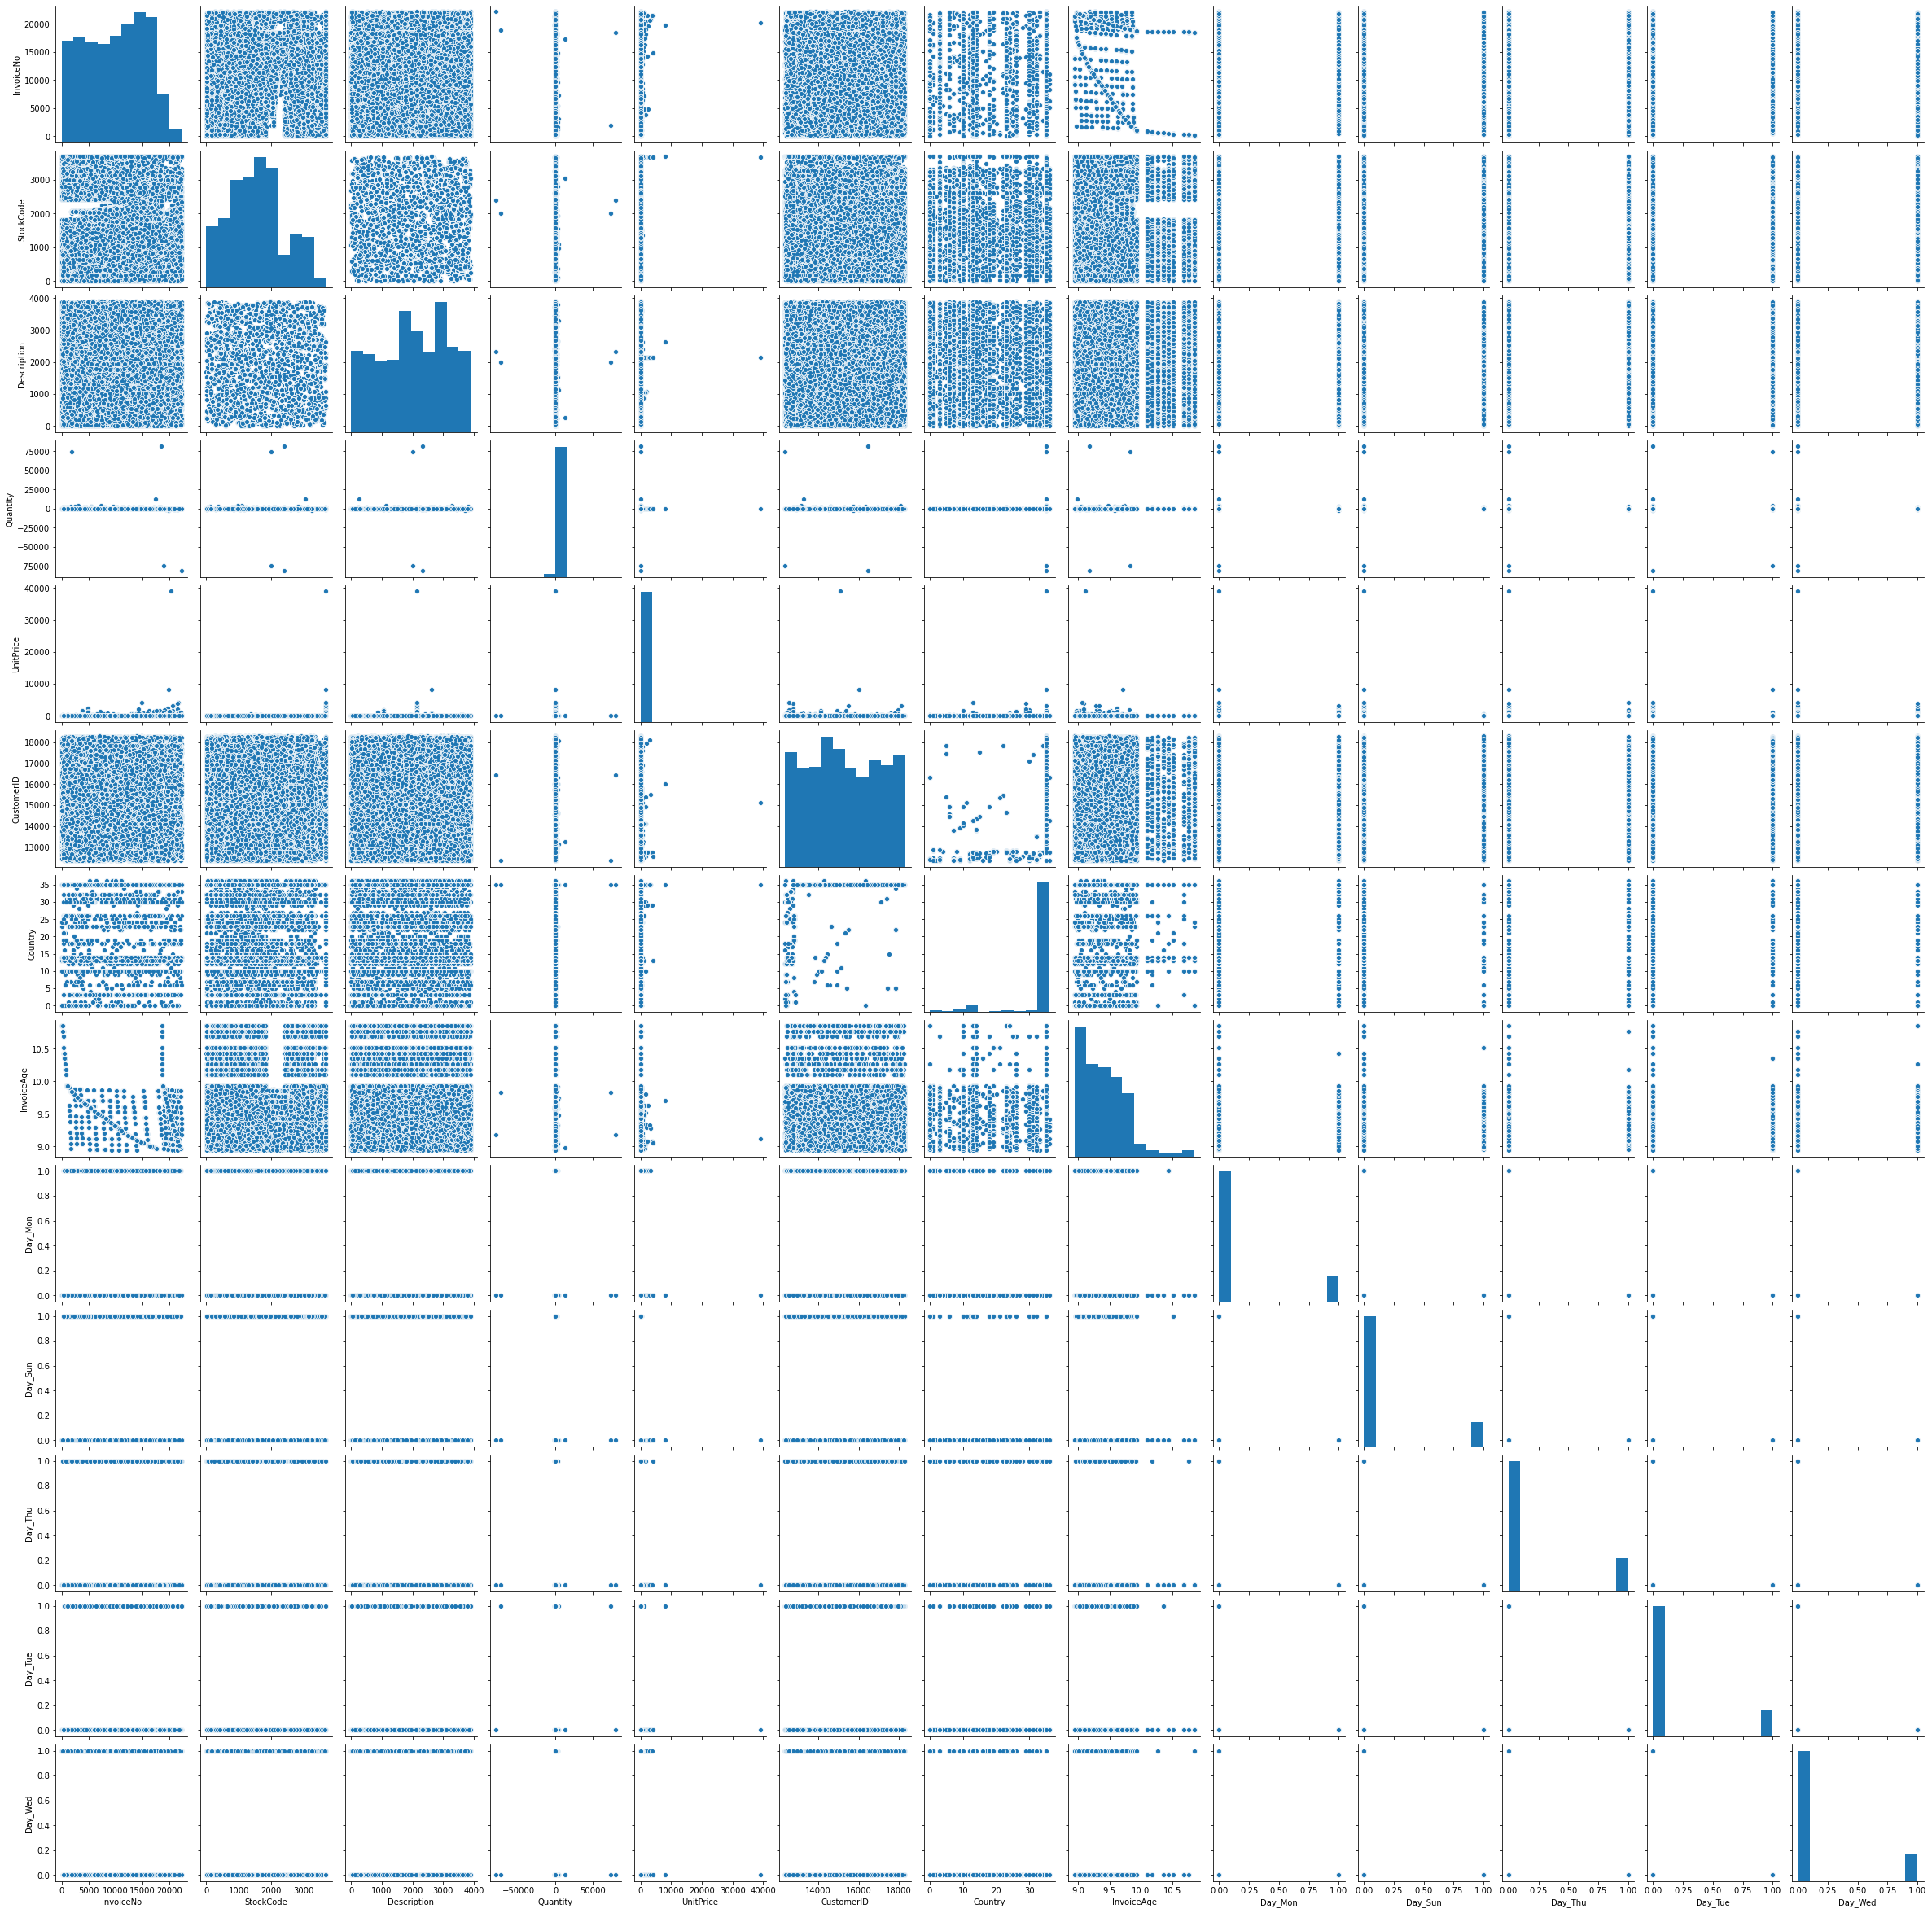

In [78]:
sns.pairplot(final_dataset)

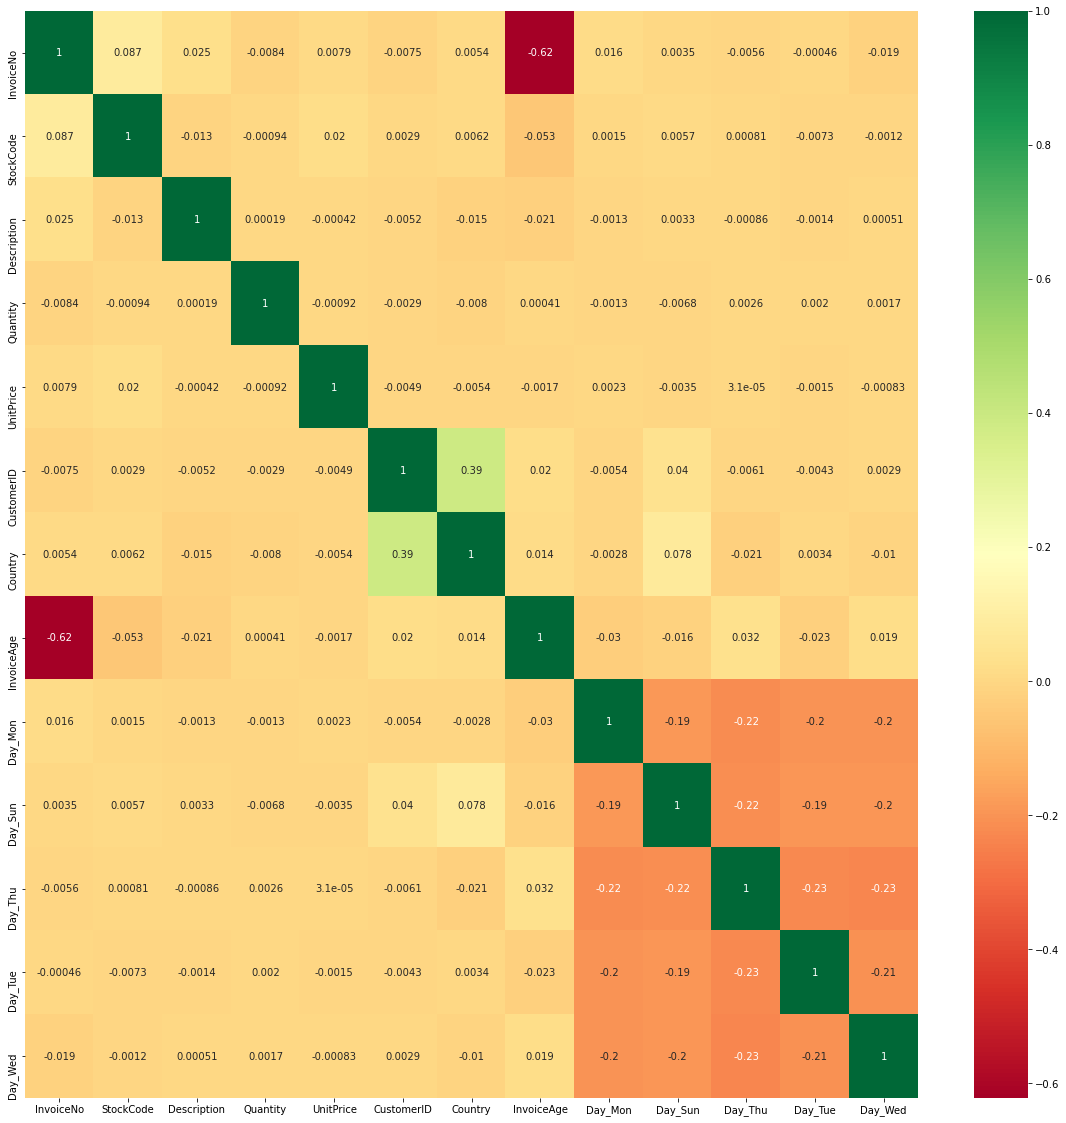

In [81]:
#get correlations of each features in dataset
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [83]:
X=final_dataset.drop(['UnitPrice'], axis=1)
y=final_dataset['UnitPrice']

In [84]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [85]:
print(model.feature_importances_)

[0.31003711 0.06892545 0.07556292 0.0088588  0.20939555 0.01233815
 0.22802304 0.01355217 0.00070764 0.03191332 0.02692294 0.01376292]


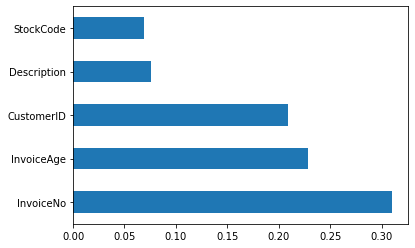

In [86]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [87]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
regressor=RandomForestRegressor()

In [90]:
import numpy as np

In [91]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [94]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [95]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [96]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [97]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.7min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.6min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.6min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.7min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.6min
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total= 4.6min
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  38.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  38.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  37.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  38.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  38.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 162.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [98]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5}

In [99]:

rf_random.best_score_

-8262.680699019951

In [100]:

predictions=rf_random.predict(X_test)

<AxesSubplot:xlabel='UnitPrice'>

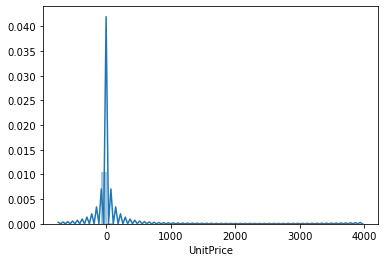

In [101]:
sns.distplot(y_test-predictions)

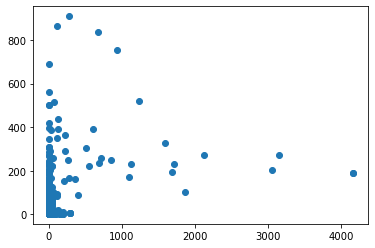

In [102]:
plt.scatter(y_test,predictions)

In [103]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [104]:
df_test1.head()

,InvoiceNo,StockCode,Description,Quantity,Month,Day,Year,CustomerID,Country,InvoiceAge
0,3139,1709,1079,3,2,Tue,2011,16161,35,9.735672
1,617,510,3457,1,12,Wed,2010,17341,35,10.267122
2,14653,604,694,36,10,Tue,2011,15158,35,9.065054
3,8634,1478,3473,2,6,Mon,2011,16033,35,9.393745
4,15546,3216,871,1,11,Sun,2011,15351,35,9.437141


In [105]:
X_train.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,InvoiceAge,Day_Mon,Day_Sun,Day_Thu,Day_Tue,Day_Wed
270280,8906,2892,1170,3,15555,35,9.616959,1,0,0,0,0
244522,479,1713,1561,12,15194,35,10.435594,1,0,0,0,0
229707,12699,2129,3100,4,16485,35,9.154253,0,0,0,0,0
52043,15793,162,1781,2,12893,35,9.187108,0,0,0,0,1
47676,5026,987,2324,18,15367,35,9.291149,0,0,0,0,0


In [106]:
df_test1=df_test1.drop(['Month'],axis=1)

In [107]:
df_test1=pd.get_dummies(df_test1,drop_first=True)
df_test1.head()

,InvoiceNo,StockCode,Description,Quantity,Year,CustomerID,Country,InvoiceAge,Day_Mon,Day_Sun,Day_Thu,Day_Tue,Day_Wed
0,3139,1709,1079,3,2011,16161,35,9.735672,0,0,0,1,0
1,617,510,3457,1,2010,17341,35,10.267122,0,0,0,0,1
2,14653,604,694,36,2011,15158,35,9.065054,0,0,0,1,0
3,8634,1478,3473,2,2011,16033,35,9.393745,1,0,0,0,0
4,15546,3216,871,1,2011,15351,35,9.437141,0,1,0,0,0


In [110]:
df_test1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'Year',
       'CustomerID', 'Country', 'InvoiceAge', 'Day_Mon', 'Day_Sun', 'Day_Thu',
       'Day_Tue', 'Day_Wed'],
      dtype='object')

In [111]:
X_train.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'CustomerID',
       'Country', 'InvoiceAge', 'Day_Mon', 'Day_Sun', 'Day_Thu', 'Day_Tue',
       'Day_Wed'],
      dtype='object')

In [112]:
df_test1=df_test1.drop(['Year'],axis=1)

In [113]:
predictions_test=rf_random.predict(df_test1)

In [114]:
predictions_test = pd.DataFrame(data=predictions_test)
predictions_test.head()

,0
0,3.916661
1,3.349118
2,2.033801
3,3.653857
4,3.727288


In [116]:
predictions_test.columns = ['UnitPrice']

In [123]:
predictions_test.to_csv('MachineHack_UnitPricePrediction_random_forest.csv',index=False)

In [122]:
predictions_test.shape

(122049, 1)

### Using Power transformation

In [124]:
# Take target variable into y
X=final_dataset.drop(['UnitPrice'], axis=1)
y=final_dataset['UnitPrice']
              
from sklearn.preprocessing import PowerTransformer
y=y.values.reshape(-1,1)

# Power transform the raw data
power = PowerTransformer(method = 'yeo-johnson', standardize =True)
y = power.fit_transform(y)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [126]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 1.7min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 1.6min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 1.6min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 1.6min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 1.6min
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total= 2.8min
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  39.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  39.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  38.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  38.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  38.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 148.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [127]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [128]:
rf_random.best_score_

-0.06604036064281364

In [129]:
predictions=rf_random.predict(X_test)

In [130]:
sns.distplot(y_test-predictions)

MemoryError: Unable to allocate 54.4 GiB for an array with shape (85434, 85434) and data type float64

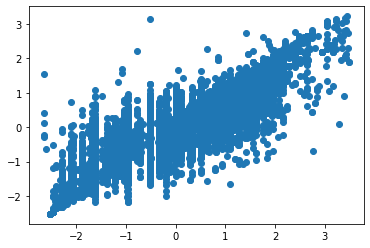

In [131]:
plt.scatter(y_test,predictions)

In [132]:
from sklearn import metrics

In [133]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10544064362371831
MSE: 0.06002328440324603
RMSE: 0.244996498757117


In [134]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model_2.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [135]:
# apply the whole pipeline to data
results = rf_random.predict(df_test1)

In [139]:
results= results.reshape(-1, 1) 

In [143]:
results.shape

(122049, 1)

In [144]:
a_inverse_transformed = power.inverse_transform(results)
a_inverse_transformed

array([[1.65114508],
       [1.25029314],
       [2.97519063],
       ...,
       [1.32858896],
       [3.78074444],
       [4.20340318]])

In [145]:
result = pd.DataFrame(data=a_inverse_transformed).round(2)
result.head()

,0
0,1.65
1,1.25
2,2.98
3,1.82
4,12.75


In [146]:
predictions_test = pd.DataFrame(data=results)
predictions_test.head()

,0
0,-0.187737
1,-0.519247
2,0.520514
3,-0.067227
4,1.960589


In [147]:
predictions_test.columns = ['UnitPrice']

In [148]:
predictions_test.to_csv('MachineHack_UnitPricePrediction_random_forest.csv',index=False)

In [149]:
predictions_test.shape

(122049, 1)